# Latar Belakang
Perusahaan yang bergerak di bidang transportasi, khususnya Taxi dan Limousine, mencatat detail perjalanan taksi di New York City.

Dengan data perjalanan tersebut, perusahaan dapat menganalisis pola perjalanan, mengidentifikasi waktu-waktu sibuk, dan mengevaluasi faktor-faktor yang mempengaruhi tarif. 

Informasi yang dihasilkan dapat membantu perusahaan dalam meningkatkan layanan transportasi dan efisiensi.


## Pernyataan Masalah [TODO]
Perusahaan ingin mengetahui ??
Informasi ini akan membantu perusahaan untuk ??

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik perjalanan/trip dengan pendapatan yang optimal?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data perjalanan taxi yang sudah dikumpulkan oleh perusahaan dalam bentuk dataset "New York City TLC Trip Record". 

Dataset dapat diakses [di sini](https://drive.google.com/file/d/1__hjXmaKbcSd6oen-B78zdyIeQ3UfQpJ/view?usp=drive_link). 



In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset berisikan informasi terkait rekaman perjalanan. 
Ada 20 kolom di dalam dataset "New York City TLC Trip Record"  sebagai berikut.

| **Fitur**                 | **Deskripsi**                                                                                                     | **Catatan**                                                                               |
|---------------------------|--------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **VendorID**              | Kode penyedia LPEP                                                                                                | 1 = Creative Mobile, 2 = VeriFone                                                               |
| **lpep_pickup_datetime**  | Tanggal dan waktu penjemputan                                                                                     | -                                                                                               |
| **lpep_dropoff_datetime** | Tanggal dan waktu pengantaran                                                                                     | -                                                                                               |
| **Passenger_count**       | Jumlah penumpang dalam kendaraan                                                                                  | -                                                                         |
| **Trip_distance**         | Jarak perjalanan dalam mil                                                                                        | -                                                                        |
| **PULocationID**          | ID zona lokasi penjemputan                                                                                        | Zona Taksi TLC                                                                                  |
| **DOLocationID**          | ID zona lokasi pengantaran                                                                                        | Zona Taksi TLC                                                                                  |
| **RateCodeID**            | Kode tarif yang berlaku pada akhir perjalanan                                                                     | 1 = Tarif standar, 2 = JFK, 3 = Newark, 4 = Nassau/Westchester, 5 = Tarif negosiasi, 6 = Grup  |
| **Store_and_fwd_flag**    | Menunjukkan apakah catatan perjalanan disimpan di memori kendaraan                                | Y = Disimpan, N = Tidak disimpan                                                 |
| **Payment_type**          | Kode metode pembayaran                                                                                            | 1 = Kartu kredit, 2 = Tunai, 3 = Tidak dikenakan biaya, 4 = Perselisihan, 5 = Tidak diketahui, 6 = Dibatalkan |
| **Fare_amount**           | Tarif berdasarkan waktu dan jarak                                                                                | -                                                                       |
| **Extra**                 | Biaya tambahan (biaya jam sibuk, biaya malam)                                                                     | -                                                                                               |
| **MTA_tax**               | Pajak MTA sebesar $0,50                                                                                           | -                                                   |
| **Improvement_surcharge** | Biaya tambahan perbaikan sebesar $0,30                                                                           | -                                                |
| **Tip_amount**            | Jumlah tip untuk pembayaran kartu kredit (tidak termasuk tip tunai)                                               | -                                                                                               |
| **Tolls_amount**          | Total tol yang dibayar selama perjalanan                                                                         | -                                                                                               |
| **Total_amount**          | Jumlah total yang dibebankan kepada penumpang (tidak termasuk tip tunai)                                         | -                                                                                               |
| **Trip_type**             | Menunjukkan metode perjalanan (langsung di jalan atau dispatch)                                                  | 1 = Langsung (street-hail), 2 = Dispatch                                                        |
| **ehail_fee**             | Biaya tambahan untuk pemesanan melalui aplikasi elektronik                                                   | -
| **congestion_surcharge**             | Biaya tambahan kemacetan yang dikenakan pada perjalanan di wilayah padat                                              | -


Berikut 5 baris teratas dan terbawah dari dataset "New York City TLC Trip Record".

In [360]:
df = pd.read_csv('data-source/NYC TLC Trip Record.csv')
display(df.head(), df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


Selain data set utama, kita akan membutuhkan support data berisikan detail Zone dari LocationID.
Data tersebut dapat diambil dari [catalog data.gov](https://catalog.data.gov/dataset/nyc-taxi-zones/resource/aca9e78b-3bbc-46e8-b639-c0095b1afd51?inner_span=True) dalam bentuk shapefile (.shp)

* `location_i`: locationID dari New York
* `borough`: nama distrik kota
* `zone`: zona dari distrik kota

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   borough     263 non-null    object  
 1   location_i  263 non-null    float64 
 2   objectid    263 non-null    float64 
 3   shape_area  263 non-null    float64 
 4   shape_leng  263 non-null    float64 
 5   zone        263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(4), geometry(1), object(2)
memory usage: 14.5+ KB


None

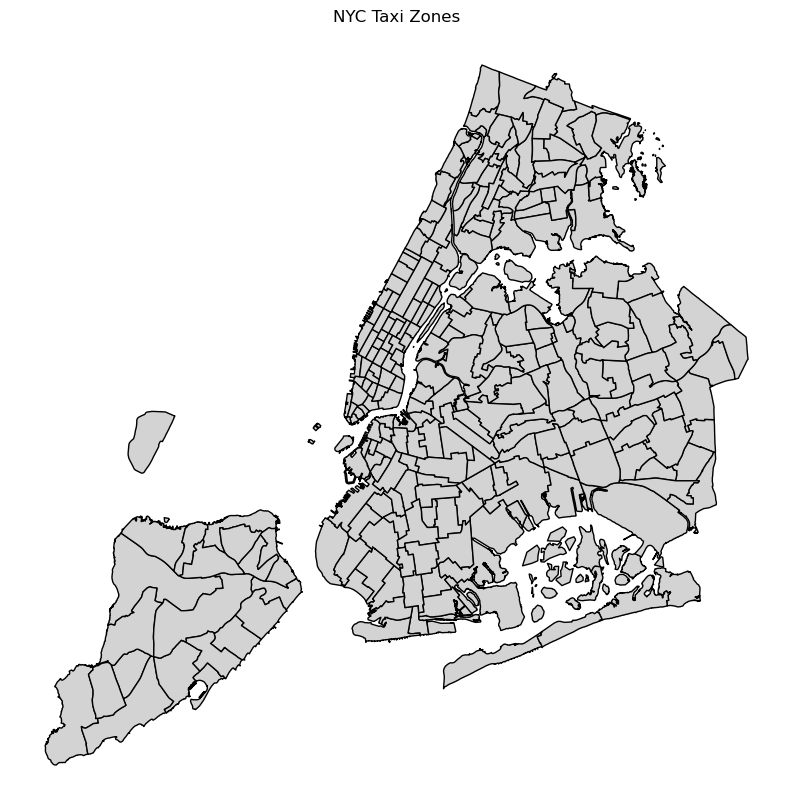

In [361]:
# Load NYC taxi zones shapefile
nyc_zones = gpd.read_file("data-source/nyc-geometry-data/geo_export_522d1eeb-8a72-4109-a4fd-624bee2ebf84.shp")
display(nyc_zones.info())


fig, ax = plt.subplots(figsize=(10, 10))
nyc_zones.plot(ax=ax, color="lightgrey", edgecolor="black")
plt.axis("off") 
plt.title("NYC Taxi Zones")
plt.show()

## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. 

Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. 

Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset "New York City TLC Trip Record".

In [362]:
initial_shape = df.shape
print(f'Jumlah baris dan kolom di dataset df adalah {initial_shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [363]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [364]:
pd.set_option('display.max_colwidth', None)
# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Secara umum, kita bisa melihat bahwa:
* dataset memiliki 20 kolom dan 68.211 baris
* kolom berikut memiliki data kosong yang diwakili dengan data NaN.
    * `payment_type`
    * `trip_type`
    * `congestion_surcharge`
    * `passenger_count`
    * `RatecodeID`
    * `store_and_fwd_flag`

* kolom `ehail_fee` tidak memiliki data sama sekali sehinggatidak relevan dalam analisis dan bisa dihapus saja.
* kolom `PULocationID` dan `DOLocationID` memiliki berisikan locationID yang detailnya dapat ditemukan di support data NYC Zones kolom `location_i`
* kolom `RatecodeID` memiliki value 99 yang berarti tidak valid.
* kolom `passenger_count` memiliki value 0 yang berarti tidak valid karena setiap perjalanan minimal ada 1 penumpang sesuai dengan referensi [berikut](https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page#:~:text=A%20taxicab%20driver%20is%20required,destination%20in%20the%20five%20boroughs.).
* kolom `extra`, `MTA_tax`, `improvement_surcharge`, dan `congestion_surcharge` memiliki value negatif yang berarti tidak valid.


### Missing Value

In [365]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

Text(0.5, 1.0, 'Missing Values Heatmap')

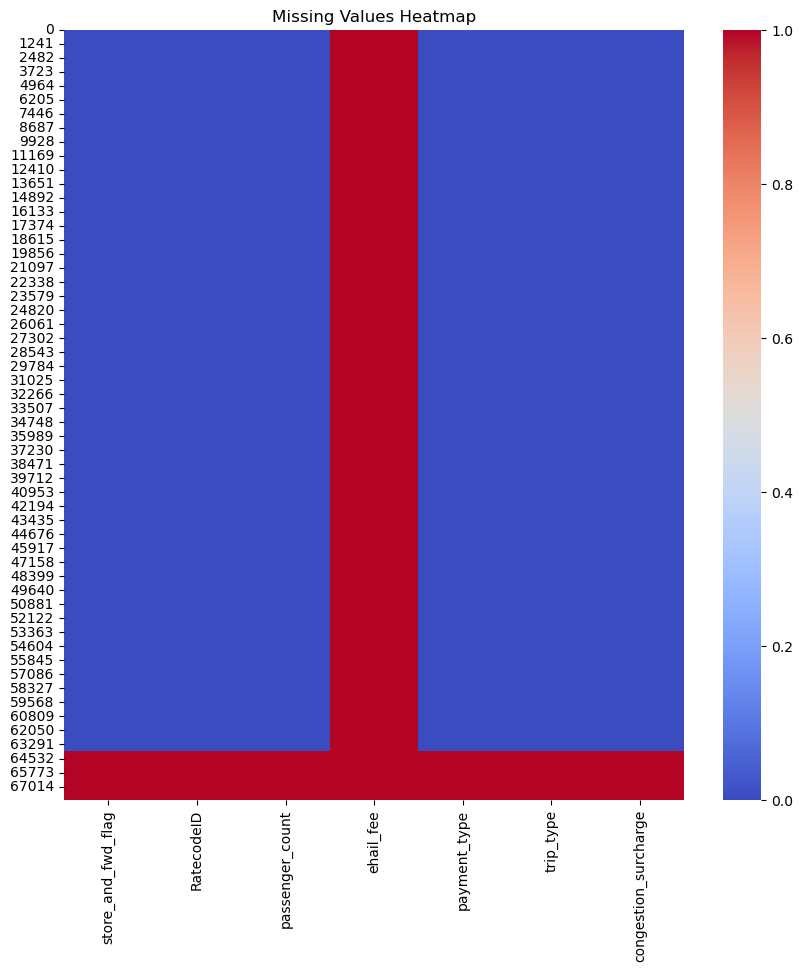

In [366]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
missing_columns = df.columns[df.isnull().any()]
missing_data = df[missing_columns]
sns.heatmap(missing_data.isnull(), cmap='coolwarm')
plt.title('Missing Values Heatmap')

Secara garis besar:

* Missing value pada kolom `ehail_fee` sebanyak 100% sehingga akan ditangani dengan drop column.


* Missing value hanya yang terdapat pada kolom di bawah ini
    * `payment_type`
    * `trip_type`
    * `congestion_surcharge`
    * `passenger_count`
    * `RatecodeID`
    * `store_and_fwd_flag`
    
Terdapat sekitar 6% missing value di setiap kolomnya dan berada pada row yang hampir sama.

Karena cenderung sedikit dan berada dalam baris yang sama, maka akan ditangani dengan cara hapus row.

In [367]:
# drop kolom 
df.drop(columns=['ehail_fee'], inplace=True)

# drop missing values
df.dropna(
    subset=['payment_type', 'trip_type', 'congestion_surcharge', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag'],
    inplace=True
)

df.isnull().any()

VendorID                 False
lpep_pickup_datetime     False
lpep_dropoff_datetime    False
store_and_fwd_flag       False
RatecodeID               False
PULocationID             False
DOLocationID             False
passenger_count          False
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
payment_type             False
trip_type                False
congestion_surcharge     False
dtype: bool

### Data Anomalies

#### RateCodeID

Mencari data dengan RatecodeID = 99

In [368]:
count_anomalies_ratecode_id = (df['RatecodeID'] == 99).sum()
print(f"Anomali RatecodeID (value = 99): {count_anomalies_ratecode_id}")

Anomali RatecodeID (value = 99): 0


Data anomali `RatecodeID` sudah terhapus bersama operasi penghapusan missing value

#### passenger_count

Mencari data dengan passenger_count = 0

In [369]:
count_anomalies_passenger_count = (df['passenger_count'] == 0).sum()
print(f"Anomali passenger_count (value = 0): {count_anomalies_passenger_count}")

count_anomalies_passenger_count = (df['passenger_count'] > 0).sum()
print(f"Anomali passenger_count (value = 0): {count_anomalies_passenger_count}")

# Hitung persentase data dengan passenger_count = 0
percentage_passenger_count_zero = (df[df['passenger_count'] == 0].shape[0] / df.shape[0]) * 100
print(f"Persentase data dengan passenger_count = 0: {percentage_passenger_count_zero:.2f}%")


Anomali passenger_count (value = 0): 336
Anomali passenger_count (value = 0): 63541
Persentase data dengan passenger_count = 0: 0.53%


Data dengan passenger_count = 0 sebanyak 0.53% setelah cleaning missing value, maka kita dapat menghapus data tersebut


In [370]:
df = df[df['passenger_count'] != 0].reset_index(drop=True)

#### Negative Values
mencari data dengan kolom `extra`, `MTA_tax`, `improvement_surcharge`, dan `congestion_surcharge` yang memiliki value negatif 

In [371]:
# Hitung total dan persentase kolom dengan value negatif
count_negative_extra = (df['extra'] < 0).sum()
print(f"Anomali extra (value < 0): {count_negative_extra}")
percentage_negative_extra = (df[df['extra'] < 0].shape[0] / df.shape[0]) * 100
print(f"Persentase data extra (value < 0): {percentage_negative_extra:.2f}%")

count_negative_mta = (df['mta_tax'] < 0).sum()
print(f"Anomali mta_tax (value < 0): {count_negative_mta}")
percentage_negative_mta = (df[df['mta_tax'] < 0].shape[0] / df.shape[0]) * 100
print(f"Persentase data mta_tax (value < 0): {percentage_negative_mta:.2f}%")

count_negative_improvement_surcharge = (df['improvement_surcharge'] < 0).sum()
print(f"Anomali improvement_surcharge (value < 0): {count_negative_improvement_surcharge}")
percentage_negative_improvement_surcharge = (df[df['improvement_surcharge'] < 0].shape[0] / df.shape[0]) * 100
print(f"Persentase data improvement_surcharge (value < 0): {percentage_negative_improvement_surcharge:.2f}%")

count_negative_congestion_surcharge = (df['congestion_surcharge'] < 0).sum()
print(f"Anomali extra (value < 0): {count_negative_extra}")
percentage_negative_congestion_surcharge = (df[df['congestion_surcharge'] < 0].shape[0] / df.shape[0]) * 100
print(f"Persentase data congestion_surcharge (value < 0): {percentage_negative_congestion_surcharge:.2f}%")

# Total persentase negative values
negative_total_count = df[(df['extra'] < 0) | 
                          (df['mta_tax'] < 0) | 
                          (df['improvement_surcharge'] < 0) | 
                          (df['congestion_surcharge'] < 0)].shape[0]

negative_total_percentage = (negative_total_count / df.shape[0]) * 100
print(f"Persentase total data negative values: {negative_total_percentage:.2f}%")



Anomali extra (value < 0): 80
Persentase data extra (value < 0): 0.13%
Anomali mta_tax (value < 0): 165
Persentase data mta_tax (value < 0): 0.26%
Anomali improvement_surcharge (value < 0): 174
Persentase data improvement_surcharge (value < 0): 0.27%
Anomali extra (value < 0): 80
Persentase data congestion_surcharge (value < 0): 0.00%
Persentase total data negative values: 0.27%


Data dengan negative values terbilang rendah di persentase 0.27% setelah cleaning missing value, maka kita juga dapat menghapus data tersebut


In [372]:
df.drop(df[(df['extra'] < 0) | 
            (df['mta_tax'] < 0) | 
            (df['improvement_surcharge'] < 0) | 
            (df['congestion_surcharge'] < 0)].index, inplace=True)

### Data Formatting
Kolom `lpep_pickup_datetime`, `lpep_dropoff_datetime`, dan `store_and_fwd_flag` masih berupa object, kita perlu konversi terlebih dahulu

In [373]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag             category
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

Setelah kita format pickup dan dropoff datetime, kita dapat menghitung durasi trip dengan dua kolom tersebut.

Untuk mempermudah analisis ke depannya, kita akan tambahkan ke dalam kolom baru `trip_duration`

In [374]:
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

max_trip_duration = df['trip_duration'].max()
min_trip_duration = df['trip_duration'].min()

print(f"Maximum trip duration: {max_trip_duration} minutes")
print(f"Minimum trip duration: {min_trip_duration} minutes")

# Tampilkan beberapa baris untuk melihat kolom baru
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

Maximum trip duration: 1439.8833333333334 minutes
Minimum trip duration: 0.0 minutes


,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
0,2023-01-01 00:26:10,2023-01-01 00:37:11,11.016667
1,2023-01-01 00:51:03,2023-01-01 00:57:49,6.766667
2,2023-01-01 00:35:12,2023-01-01 00:41:32,6.333333
3,2023-01-01 00:13:14,2023-01-01 00:19:03,5.816667
4,2023-01-01 00:33:04,2023-01-01 00:39:02,5.966667


Dari format data trip_duration, kita bisa melihat satu lagi anomali di mana trip_duration = 0 yang kemungkinan kesalahan input user.
Kita akan hitung terlebih dahulu persentase data tersebut.

In [375]:
count_trip_duration_zero = (df['trip_duration'] == 0).sum()
print(f"Anomali trip_duration (value = 0): {count_trip_duration_zero}")
percentage_trip_duration_zero = (df[df['trip_duration'] == 0].shape[0] / df.shape[0]) * 100
print(f"Persentase data trip_duration (value = 0): {percentage_trip_duration_zero:.2f}%")


Anomali trip_duration (value = 0): 58
Persentase data trip_duration (value = 0): 0.09%


Data dengan trip duration = 0 sangat rendah di persentase 0.09% setelah cleaning missing value, maka kita juga akan menghapus data tersebut

In [376]:
df.drop(df[df['trip_duration'] == 0].index, inplace=True)

### Outlier
Di sini kita akan mencari outlier berdasarkan `lpep_pickup_datetime` untuk memisahkan transaksi dengan tanggal trip yang sudah tidak relevan

In [377]:
transaction_per_month_year = df['lpep_pickup_datetime'].dt.to_period('M').value_counts().sort_index()
transaction_per_month_year = transaction_per_month_year.rename_axis('Month-Year').reset_index(name='Transaction Count')
transaction_per_month_year


,Month-Year,Transaction Count
0,2009-01,1
1,2022-12,2
2,2023-01,63305
3,2023-02,1


Terdapat 4 outlier:
* 1 transaksi di tahun 2009 
* 2 transaksi di tahun 2022
* 1 transaksi di Februari 2023

Supaya lebih objective maka kita hanya akan analysis data bulan Januari tahun 2023, kita akan hapus data selain itu

In [378]:
df.drop(df[(df['lpep_pickup_datetime'] < '2023-01-01') | (df['lpep_pickup_datetime'] >= '2023-02-01')].index, inplace=True)

transaction_per_month_year = df['lpep_pickup_datetime'].dt.to_period('M').value_counts().sort_index()
transaction_per_month_year = transaction_per_month_year.rename_axis('Month-Year').reset_index(name='Transaction Count')
transaction_per_month_year


,Month-Year,Transaction Count
0,2023-01,63305


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [379]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)

print(f"Data sebelum cleaning: {initial_shape[0]} baris")
print(f"Data sesudah cleaning: {df.shape[0]} baris")

missing_rows_count = initial_shape[0] - df.shape[0]
percentage_missing = (missing_rows_count / initial_shape[0]) * 100
print(f"Jumlah data yang hilang setelah cleaning: {missing_rows_count} baris")
print(f"Persentase data yang hilang setelah cleaning: {percentage_missing:.2f}%")

dfDesc


Data sebelum cleaning: 68211 baris
Data sesudah cleaning: 63305 baris
Jumlah data yang hilang setelah cleaning: 4906 baris
Persentase data yang hilang setelah cleaning: 7.19%


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[1, 2]"
1,lpep_pickup_datetime,datetime64[ns],0,62279,"[2023-01-17T12:24:30.000000000, 2023-01-07T13:18:00.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,62220,"[2023-01-16T15:35:12.000000000, 2023-01-11T16:34:37.000000000]"
3,store_and_fwd_flag,category,0,2,"[Y, N]"
4,RatecodeID,float64,0,5,"[5.0, 2.0]"
5,PULocationID,int64,0,221,"[265, 253]"
6,DOLocationID,int64,0,248,"[164, 82]"
7,passenger_count,float64,0,9,"[7.0, 1.0]"
8,trip_distance,float64,0,1725,"[8.47, 5.45]"
9,fare_amount,float64,0,433,"[19.8, 122.4]"


Sebelum dibersihkan, kita memiliki **68.211** baris data, sekarang kita memiliki **63.305** baris. 
Ada **4.906** baris data tidak valid yang dihapus dengan total persentase **7.19%** data yang dibersihkan.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu jawaban dari masalah yang dipertanyakan sebelumnya.

Analisis akan dilakukan dengan mencari pengaruh kolom-kolom yang tersedia dengan `total_amount` pada setiap konteksnya dan banyaknya trip yang terjadi

### Waktu dan Durasi
Kita akan menganalisis kolom lpep_pickup_datetime, lpep_dropoff_datetime, dan trip_duration untuk menjawab pertanyaan berikut
* Pada tanggal berapa saja trip terbanyak terjadi?
* Pada hari apa saja transaksi terbanyak terjadi?
* Pada hari apa saja total amount terbanyak didapat?
* Apakah trip_duration mempengaruhi total_amount dan total pendapatan transaksi di hari tersebut?

Tanggal dengan Total Transaksi Terbanyak

In [380]:
transactions_per_day = df.groupby(df['lpep_pickup_datetime'].dt.date).size()

transactions_df = transactions_per_day.reset_index(name='transaction_count')
transactions_df['date'] = pd.to_datetime(transactions_df['lpep_pickup_datetime'])
transactions_df.set_index('date', inplace=True)
transactions_df.sort_index(inplace=True)

transactions_df.sort_values(by='transaction_count', ascending=False).head(5)[['transaction_count']]

,transaction_count
date,
2023-01-25,2491
2023-01-26,2481
2023-01-19,2406
2023-01-06,2368
2023-01-12,2350


Tanggal dengan Total Amount Terbanyak

In [381]:
total_amount_per_day = df.groupby(df['lpep_pickup_datetime'].dt.date)['total_amount'].sum()

total_amount_df = total_amount_per_day.reset_index(name='total_amount')
total_amount_df['date'] = pd.to_datetime(total_amount_df['lpep_pickup_datetime'])
total_amount_df.set_index('date', inplace=True)

total_amount_df.sort_values(by='total_amount', ascending=False).head(5)[['total_amount']]

,total_amount
date,
2023-01-26,53914.59
2023-01-25,53483.37
2023-01-19,51991.61
2023-01-13,51078.56
2023-01-12,49951.84


Berdasarkan data di atas, terlihat bahwa trip terbanyak cenderung terjadi di akhir bulan January yang biasanya merupakan puncak dari musim dingin.

 Hal ini menjadi indikasi adanya kecenderungan penggunaan taxi saat musim dingin dikarenakan penurunan suhu yang dapat kita lihat pada sumber [berikut](https://www.timeanddate.com/weather/@z-us-10001/historic?month=1&year=2023).

Transaksi dikategorikan berdasarkan hari

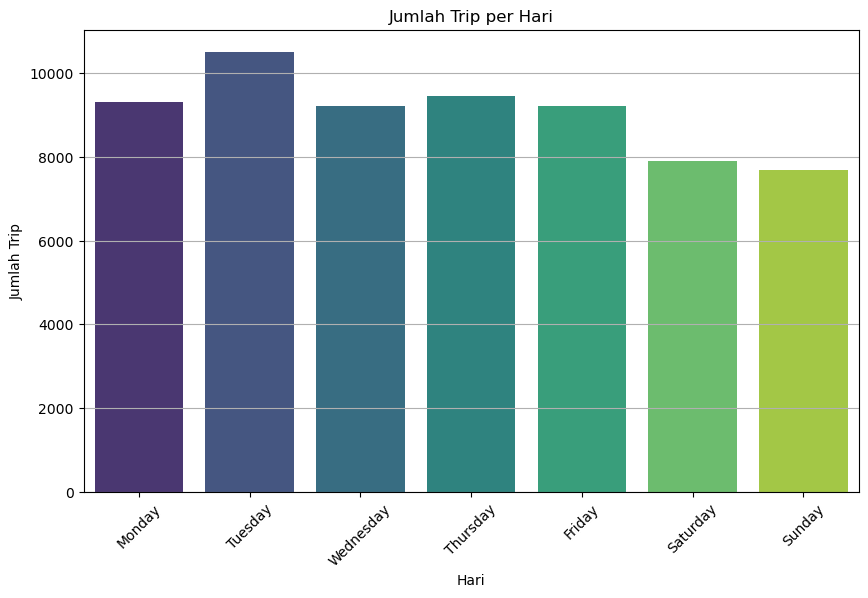

In [382]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day_name()
transactions_per_day = df['pickup_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Visualisasikan menggunakan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values, palette='viridis')
plt.title('Jumlah Trip per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Trip')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

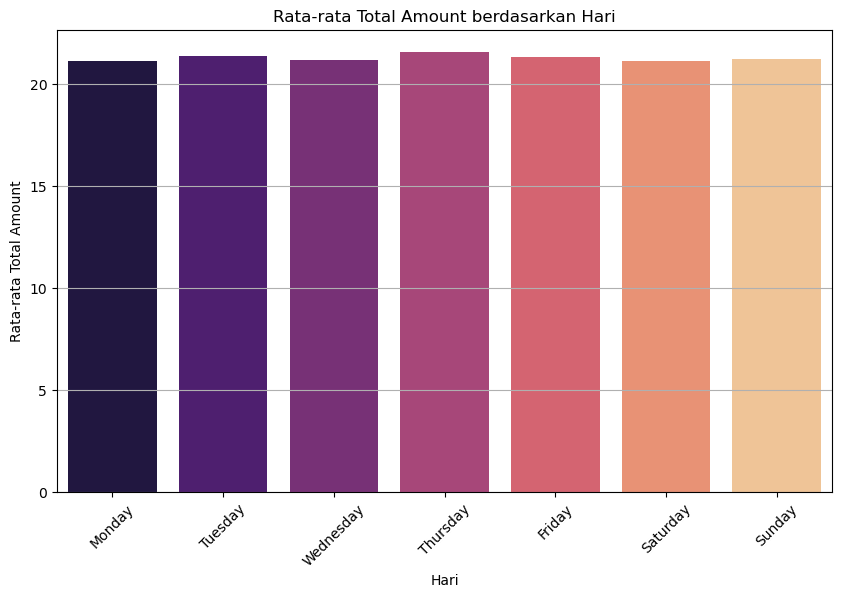

In [383]:
avg_total_amount_per_day = df.groupby(df['lpep_pickup_datetime'].dt.day_name())['total_amount'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_total_amount_per_day.index, y=avg_total_amount_per_day.values, palette='magma')
plt.title('Rata-rata Total Amount berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Total Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Total Amount Trip berdasarkan durasi

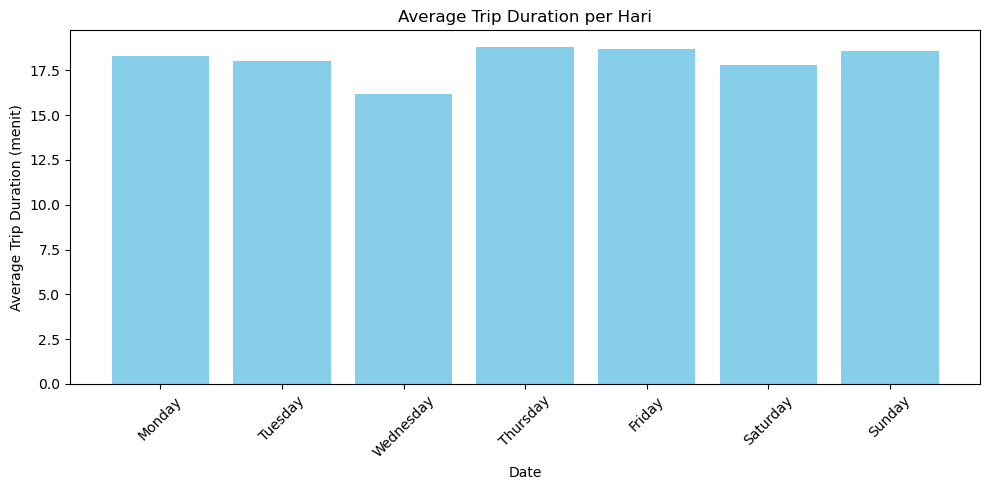

In [384]:
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day_name()
avg_trip_duration_by_day = df.groupby('pickup_day')['trip_duration'].mean()
avg_trip_duration_by_day = avg_trip_duration_by_day.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
avg_trip_duration_by_day = avg_trip_duration_by_day.reset_index()
avg_trip_duration_by_day.columns = ['day_of_week', 'avg_trip_duration']


plt.figure(figsize=(10, 5))
plt.bar(avg_trip_duration_by_day['day_of_week'], avg_trip_duration_by_day['avg_trip_duration'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (menit)')
plt.title('Average Trip Duration per Hari')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kita dapat menyimpulkan bahwa jumlah trip di weekend lebih sedikit dari weekday, namun total amount yang dihasilkan hampir sama

Perbandingan Trip Duration dengan Total Amount

Akan dilakukan dengan uji korelasi metode Spearman karena data tidak terdistibusi normal

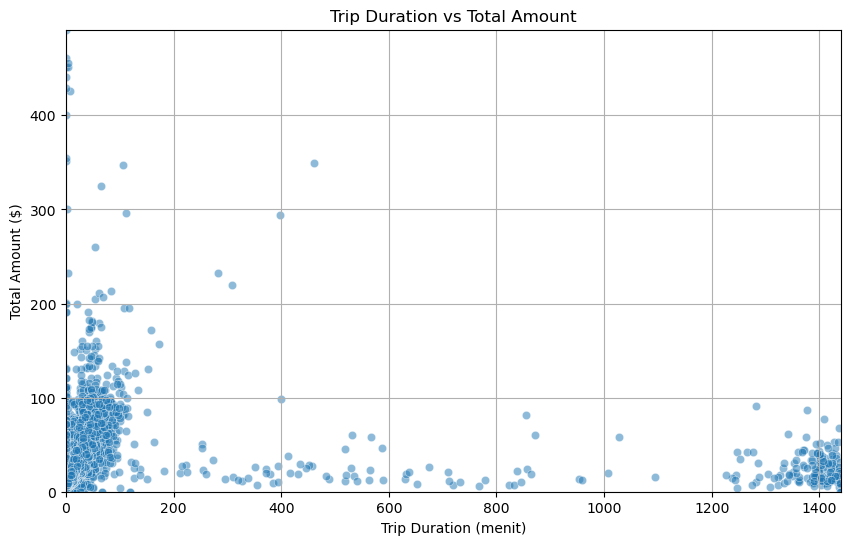

Korelasi antara Trip Duration dan Total Amount: 0.84


In [385]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_duration', y='total_amount', alpha=0.5)
plt.title('Trip Duration vs Total Amount')
plt.xlabel('Trip Duration (menit)')
plt.ylabel('Total Amount ($)')
plt.xlim(0, df['trip_duration'].max())
plt.ylim(0, df['total_amount'].max())
plt.grid()
plt.show()

correlation = df[['trip_duration', 'total_amount']].corr(method='spearman').iloc[0, 1]
print(f'Korelasi antara Trip Duration dan Total Amount: {correlation:.2f}')

Trip Duration dan Total Amount memiliki hubungan kuat dengan korelasi 0.84

Semakin lama durasi, maka semakin besar total amount

### Jumlah Penumpang

Kita akan menganalisis kolom `passenger_count` untuk mengetahui apakah jumlah penumpang menjadi karakteristik yang mempengaruhi pendapatan.

Berikut pertanyaan-pertanyaan yang akan membantu kita
* Bagaimana pengelompokan jumlah penumpang dengan banyak transaksi dan total amount?
* Apakah semakin banyak penumpang, semakin besar pula total amount yang didapat?

Pengelompokan Penumpang dengan Total Transaksi

   passenger_count  total_amount  transaction_count  \
0              1.0    1140745.63              54109   
1              2.0     115102.71               5056   
2              3.0      22842.24                949   
3              4.0       8163.44                362   
4              5.0      40391.04               1768   
5              6.0      20840.00               1053   
6              7.0        203.30                  4   
7              8.0         24.90                  2   
8              9.0        109.49                  2   

   average_amount_per_transaction  
0                       21.082364  
1                       22.765568  
2                       24.069800  
3                       22.550939  
4                       22.845611  
5                       19.791073  
6                       50.825000  
7                       12.450000  
8                       54.745000  


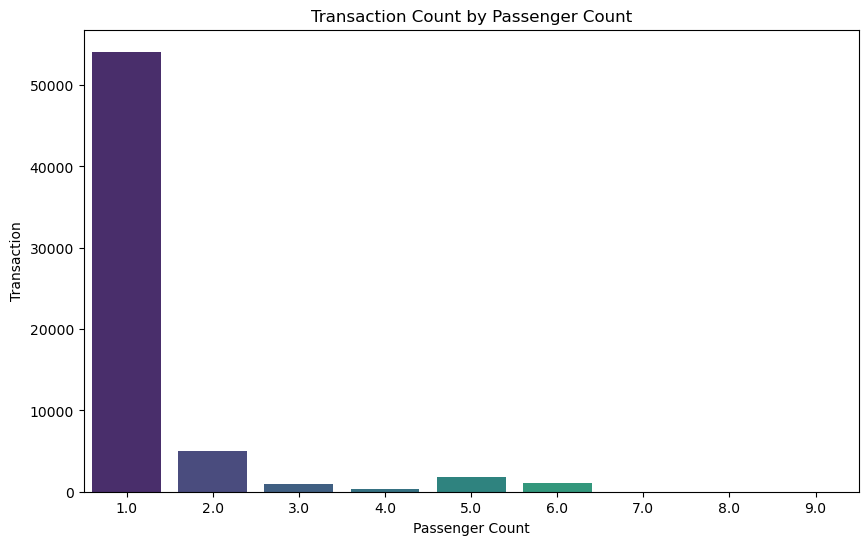

In [386]:
passenger_summary = df.groupby('passenger_count').agg(
    total_amount=('total_amount', 'sum'),
    transaction_count=('total_amount', 'count')
).reset_index()

# Hitung rata-rata transaksi
passenger_summary['average_amount_per_transaction'] = (
    passenger_summary['total_amount'] / passenger_summary['transaction_count']
)

print(passenger_summary)

plt.figure(figsize=(10, 6))
sns.barplot(x=passenger_summary.passenger_count, y=passenger_summary['transaction_count'], palette="viridis")
plt.xlabel("Passenger Count")
plt.ylabel("Transaction")
plt.title("Transaction Count by Passenger Count")
plt.show()

Dari hasil analisis di atas terlihat jika transaksi terbanyak ada pada 1 penumpang.


Untuk analisis lebih lanjut kita akan mulai uji statistik untuk mengetahui perbedaan signifikan pada total_amount antara trip 1 penumpang dan banyak penumpang.

Hipotesis

H0: Tidak Terdapat perbedaan signifikan pada total amount antara trip dengan 1 penumpang dan banyak penumpang.

Ha: Terdapat perbedaan signifikan pada total amount antara trip dengan 1 penumpang dan banyak penumpang.

Uji Normalitas
menggunakan Kolmogorov-Smirnov karena data sampel yang cukup besar (> 5000)

In [387]:
from scipy.stats import kstest

total_amount_1_passenger = df[df['passenger_count'] == 1]['total_amount']
total_amount_multi_passenger = df[df['passenger_count'] > 1]['total_amount']

# Uji Kolmogorov-Smirnov untuk 1 penumpang
ks_stat_1, p_value_1 = kstest(total_amount_1_passenger, 'norm')
print("K-S Test (1 Passenger):", ks_stat_1, p_value_1)

# Uji Kolmogorov-Smirnov untuk banyak penumpang
ks_stat_multi, p_value_multi = kstest(total_amount_multi_passenger, 'norm')
print("K-S Test (Multi Passenger):", ks_stat_multi, p_value_multi)

if p_value_1 < 0.05 and p_value_multi < 0.05:
    print("Data total_amount tidak terdistribusi normal.")
else:
    print("Data total_amount terdistribusi normal.")


K-S Test (1 Passenger): 0.9983013051376158 0.0
K-S Test (Multi Passenger): 0.9992625857312454 0.0
Data total_amount tidak terdistribusi normal.


Data tidak terdistribusi normal, akan dilakukan uji non-parametric dengan Uji Mann-Whitney U.



In [388]:
import scipy.stats as stats

total_amount_1 = df[df['passenger_count'] == 1]['total_amount']
total_amount_multi = df[df['passenger_count'] > 1]['total_amount']

# Melakukan uji Mann-Whitney U
stat, p_value_mann_whitney = stats.mannwhitneyu(total_amount_1, total_amount_multi, alternative='two-sided')

print(f"Statistik U: {stat}")
print(f"P-value: {p_value_mann_whitney:.2f}")

if p_value_mann_whitney < 0.05:
    print("Terdapat perbedaan signifikan pada total amount antara trip dengan 1 penumpang dan banyak penumpang (tolak H0).")
else:
    print("Tidak terdapat perbedaan signifikan pada total amount antara trip dengan 1 penumpang dan banyak penumpang (gagal tolak H0).")


Statistik U: 235898131.0
P-value: 0.00
Terdapat perbedaan signifikan pada total amount antara trip dengan 1 penumpang dan banyak penumpang (tolak H0).


### Metode Pembayaran

Selanjutnya kita akan menganalisis kolom `payment_type` untuk mengetahui bagaimana pengaruh metode pembayaran dengan total amount

Total Amount setiap metode pembayaran

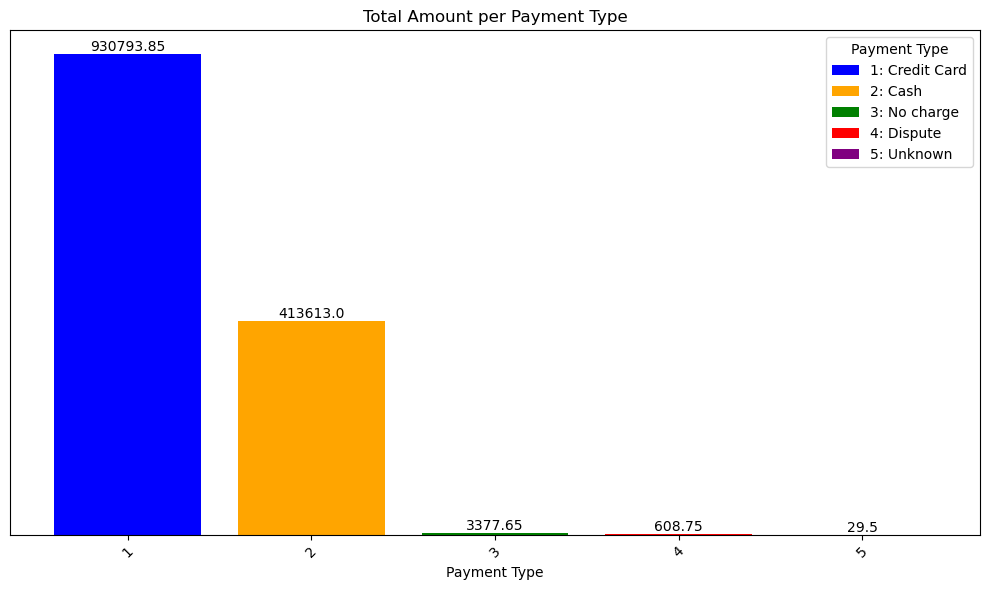

In [389]:
payment_type_amount = df.groupby('payment_type')['total_amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(payment_type_amount['payment_type'], payment_type_amount['total_amount'], color=['blue', 'orange', 'green', 'red', 'purple'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

payment_type_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown'
}

for payment_type in payment_type_labels:
    plt.bar(1, 1, label=f'{payment_type}: {payment_type_labels[payment_type]}', color=['blue', 'orange', 'green', 'red', 'purple'][payment_type-1])

plt.title('Total Amount per Payment Type')
plt.xlabel('Payment Type')
plt.xticks(rotation=45)
plt.legend(title='Payment Type', loc='upper right')
plt.yticks([])
plt.tight_layout()
plt.show()

Karena terlihat payment_type 1 dan 2 saja yang jumlahnya signifikan pada bar plot, maka selanjutnya akan kita uji statistik untuk dua payment type tersebut.

Hipotesis

H0: Tidak Terdapat perbedaan signifikan pada total amount antara credit card dan cash.

Ha: Terdapat perbedaan signifikan pada total amount antara credit card dan cash.

Berikutnya akan dilakukan uji normalitas menggunakan Kolmogorov-Smirnov karena data sampel yang cukup besar (> 5000)

In [390]:
payment_type_1 = df[df['payment_type'] == 1]['total_amount']
payment_type_2 = df[df['payment_type'] == 2]['total_amount']

ks_stat_payment_type_1, p_value_payment_type_1 = kstest(payment_type_1, 'norm')
print("K-S Test (credit card):", ks_stat_payment_type_1, p_value_payment_type_1)

ks_stat_payment_type_2, p_value_payment_type_2 = kstest(payment_type_2, 'norm')
print("K-S Test (cash):", ks_stat_payment_type_2, p_value_payment_type_2)

if p_value_payment_type_1 < 0.05 and p_value_payment_type_2 < 0.05:
    print("Data total_amount tidak terdistribusi normal.")
else:
    print("Data total_amount terdistribusi normal.")



K-S Test (credit card): 0.9987654938036591 0.0
K-S Test (cash): 0.9981373268809299 0.0
Data total_amount tidak terdistribusi normal.


Data tidak terdistribusi normal, akan dilakukan uji non-parametric dengan Uji Mann-Whitney U.


In [391]:
# Melakukan uji Mann-Whitney U
stat, p_value_mann_whitney = stats.mannwhitneyu(payment_type_1, payment_type_2, alternative='two-sided')

print(f"Statistik U: {stat}")
print(f"P-value: {p_value_mann_whitney:.2f}")

if p_value_mann_whitney < 0.05:
    print("Terdapat perbedaan signifikan pada total amount antara credit card dan cash (tolak H0).")
else:
    print("Tidak terdapat perbedaan signifikan pada total amount antara antara credit card dan cas (gagal tolak H0).")

Statistik U: 593045292.0
P-value: 0.00
Terdapat perbedaan signifikan pada total amount antara credit card dan cash (tolak H0).


### Lokasi dan Jarak

Kita akan menganalisis kolom `PULocationID`, `DOLocationID`, dan `trip_distance` 
Berikut pertanyaan-pertanyaan yang akan membantu kita
* Bagaimana persebaran lokasi pickup dan dropoff?
* Lokasi mana saja yang paling banyak pickup?
* Apakah jarak yang jauh mempengaruhi total amount yang didapat?

Persebaran Lokasi Pick up dan Drop off

Kita akan menampilkan menggunakan data support geometry untuk mengetahui apakan seluruh lokasi New York sudah tercover

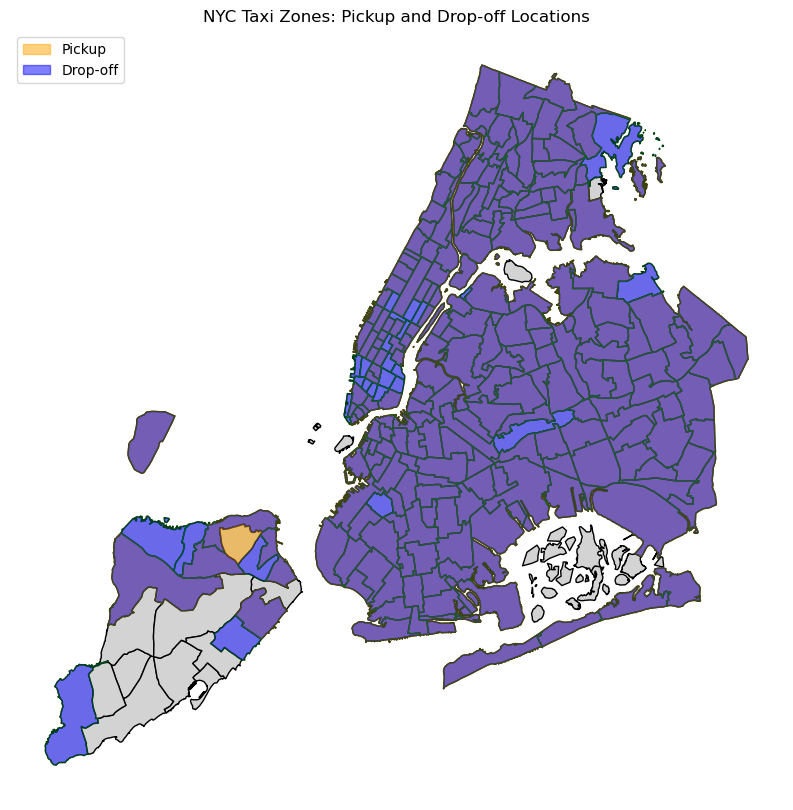

In [392]:
zone_data_pu = nyc_zones[nyc_zones['location_i'].isin(df['PULocationID'].unique())]
zone_data_do = nyc_zones[nyc_zones['location_i'].isin(df['DOLocationID'].unique())]

fig, ax = plt.subplots(figsize=(10, 10))
nyc_zones.plot(ax=ax, color="lightgrey", edgecolor="black")

zone_data_pu.plot(ax=ax, color="orange", edgecolor="red", alpha=0.5, label="Pickup Zones")
zone_data_do.plot(ax=ax, color="blue", edgecolor="green", alpha=0.5, label="Drop off Zones")

plt.title("NYC Taxi Zones: Pickup and Drop-off Locations")
plt.axis("off") 
pickup_patch = mpatches.Patch(color="orange", alpha=0.5, label="Pickup")
dropoff_patch = mpatches.Patch(color="blue", alpha=0.5, label="Drop-off")
plt.legend(handles=[pickup_patch, dropoff_patch], loc="upper left")
plt.show() 

Dari visual di atas kita dapat melihat beberapa zona yang belum tercover oleh pick up location.

Berikut detail dari zona tersebut.

Zone belum tercover Pickup Zones:
['Jamaica Bay' 'Alphabet City' 'Arden Heights' 'Arrochar/Fort Wadsworth'
 'Astoria Park' 'Battery Park' 'Battery Park City'
 'Bay Terrace/Fort Totten' 'Broad Channel' 'Charleston/Tottenville'
 'Country Club' 'East Village' "Eltingville/Annadale/Prince's Bay"
 'Hudson Sq' 'Forest Park/Highland Park' 'Freshkills Park'
 "Governor's Island/Ellis Island/Liberty Island" 'Gramercy' 'Great Kills'
 'Great Kills Park' 'Green-Wood Cemetery' 'Grymes Hill/Clifton'
 'Heartland Village/Todt Hill' 'Lenox Hill West' 'Lincoln Square East'
 'Little Italy/NoLiTa' 'Lower East Side' 'Mariners Harbor'
 'Meatpacking/West Village West' 'Midtown East' 'Midtown North'
 'Midtown South' 'New Dorp/Midland Beach' 'Oakwood' 'Pelham Bay Park'
 'Port Richmond' 'Rikers Island' 'Rossville/Woodrow' 'SoHo'
 'Stuy Town/Peter Cooper Village' 'Upper East Side South' 'West Village']
Wilayah belum tercover Pickup Zones:
['Queens' 'Manhattan' 'Staten Island' 'Bronx' 'Brooklyn']


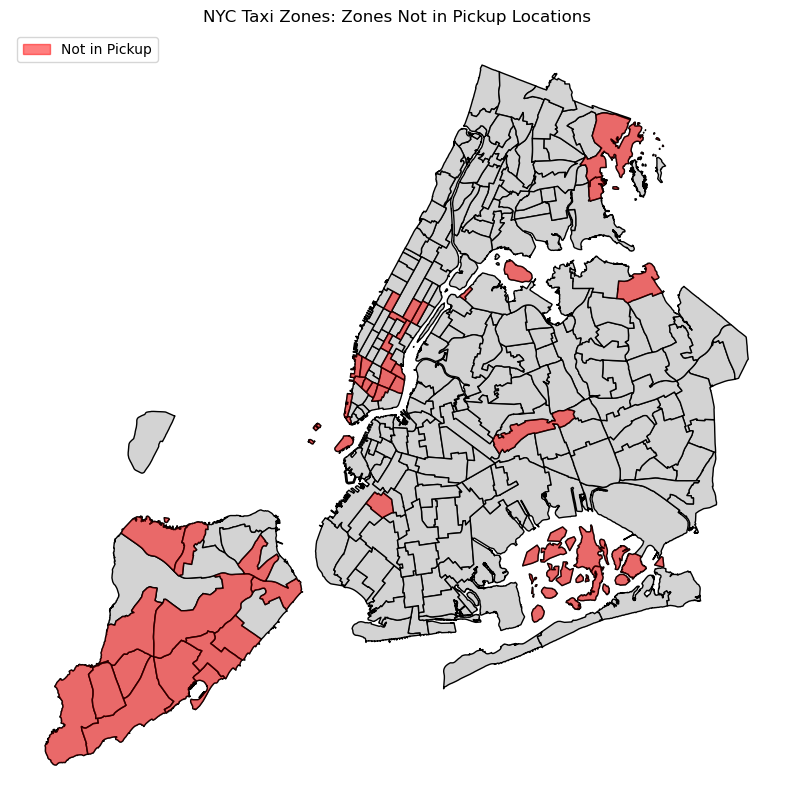

In [393]:

zone_data_not_in_pu = nyc_zones[~nyc_zones['location_i'].isin(df['PULocationID'].unique())]

print("Zone belum tercover Pickup Zones:")
print(zone_data_not_in_pu['zone'].unique())

print("Wilayah belum tercover Pickup Zones:")
print(zone_data_not_in_pu['borough'].unique())

fig2, ax2 = plt.subplots(figsize=(10, 10))
nyc_zones.plot(ax=ax2, color="lightgrey", edgecolor="black")


zone_data_not_in_pu.plot(ax=ax2, color="red", edgecolor="black", alpha=0.5, label="Zones Not in Pickup")
plt.title("NYC Taxi Zones: Zones Not in Pickup Locations")
plt.axis("off")
not_in_pu_patch = mpatches.Patch(color="red", alpha=0.5, label="Not in Pickup")
plt.legend(handles=[not_in_pu_patch], loc="upper left")

plt.show()

Lokasi Pickup Terbanyak dan Terendah

In [394]:
top_pickup_counts = df['PULocationID'].value_counts()
top_10_pickups = top_pickup_counts.head(10)
top_10_pickup_df = top_10_pickups.reset_index()
top_10_pickup_df.columns = ['PULocationID', 'Count']
top_10_pickup_with_names = top_10_pickup_df.merge(nyc_zones[['location_i', 'zone', 'borough']], 
                                                  left_on='PULocationID', 
                                                  right_on='location_i', 
                                                  how='left')

print("Top 10 Lokasi Pickup: ")
print(top_10_pickup_with_names[['PULocationID', 'borough', 'zone', 'Count']])



Top 10 Lokasi Pickup: 
   PULocationID    borough                      zone  Count
0            74  Manhattan         East Harlem North  12915
1            75  Manhattan         East Harlem South   8755
2            95     Queens              Forest Hills   3803
3            41  Manhattan            Central Harlem   3700
4           166  Manhattan       Morningside Heights   3592
5            82     Queens                  Elmhurst   2849
6            43  Manhattan              Central Park   2841
7            97   Brooklyn               Fort Greene   2131
8             7     Queens                   Astoria   1813
9           244  Manhattan  Washington Heights South   1623


In [403]:
top_pickup_counts = df['PULocationID'].value_counts()
least_pickups = top_pickup_counts.tail(10)
least_pickups_df = least_pickups.reset_index()
least_pickups_df.columns = ['PULocationID', 'Count']
least_pickups_with_names = least_pickups_df.merge(nyc_zones[['location_i', 'zone', 'borough']], 
                                                  left_on='PULocationID', 
                                                  right_on='location_i', 
                                                  how='left')

print("Least 10 Lokasi Pickup: ")
print(least_pickups_with_names[['PULocationID', 'borough', 'zone', 'Count']])

Least 10 Lokasi Pickup: 
   PULocationID        borough                                 zone  Count
0           221  Staten Island                            Stapleton      1
1            88      Manhattan             Financial District South      1
2           170      Manhattan                          Murray Hill      1
3           100      Manhattan                     Garment District      1
4           261      Manhattan                   World Trade Center      1
5            68      Manhattan                         East Chelsea      1
6            27         Queens  Breezy Point/Fort Tilden/Riis Beach      1
7           114      Manhattan              Greenwich Village South      1
8            59          Bronx                         Crotona Park      1
9           245  Staten Island                        West Brighton      1


Hubungan antara trip distance dan total amount

Kita akan melakukan uji statistik untuk menjawabnya dengan hipotesis

H0: Tidak terdapat hubungan signifikan antara total_amount dan trip_distance.

Ha: Terdapat hubungan signifikan antara total_amount dan trip_distance.


Uji Normalitas

Menggunakan metode Kolmogorov-Smirnov untuk data banyak 

In [396]:

_, p_value_total_amount = stats.kstest(df['total_amount'], 'norm', args=(df['total_amount'].mean(), df['total_amount'].std()))
_, p_value_trip_distance = stats.kstest(df['trip_distance'], 'norm', args=(df['trip_distance'].mean(), df['trip_distance'].std()))
print("K-S Test (Total Amount):", p_value_total_amount)
print("K-S Test (Trip Distance):", p_value_trip_distance)

if p_value_total_amount < 0.05 and p_value_trip_distance < 0.05:
    print("Data tidak terdistribusi normal.")
else:
    print("Data terdistribusi normal.")


K-S Test (Total Amount): 0.0
K-S Test (Trip Distance): 0.0
Data tidak terdistribusi normal.


Data tidak terdistribusi normal, akan dilakukan uji korelasi dengan metode Spearman

In [397]:
corr_coef, p_value_corr = stats.spearmanr(df['total_amount'], df['trip_distance'])

print(f"Koefisien korelasi: {corr_coef:.2f}")
print(f"P-Value: {p_value_corr:.4f}")

if p_value_corr < 0.05:
    print("Terdapat hubungan signifikan antara total_amount dan trip_distance. (Tolak H0)")
else:
    print("Tidak terdapat hubungan signifikan antara total_amount dan trip_distance. (Gagal Tolak H0)")


Koefisien korelasi: 0.80
P-Value: 0.0000
Terdapat hubungan signifikan antara total_amount dan trip_distance. (Tolak H0)


### Tarif Tambahan

Kita akan menganalisis kolom `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `congestion_surcharge`

Kemudian mencari tahu bagaimana hubungan kolom-kolom tersebut dengan `fare_amount` karena `fare_amount` merupakan dasar dari tarif trip.


Uji Korelasi

Menggunakan metode spearman karena data tidak terdistribusi normal

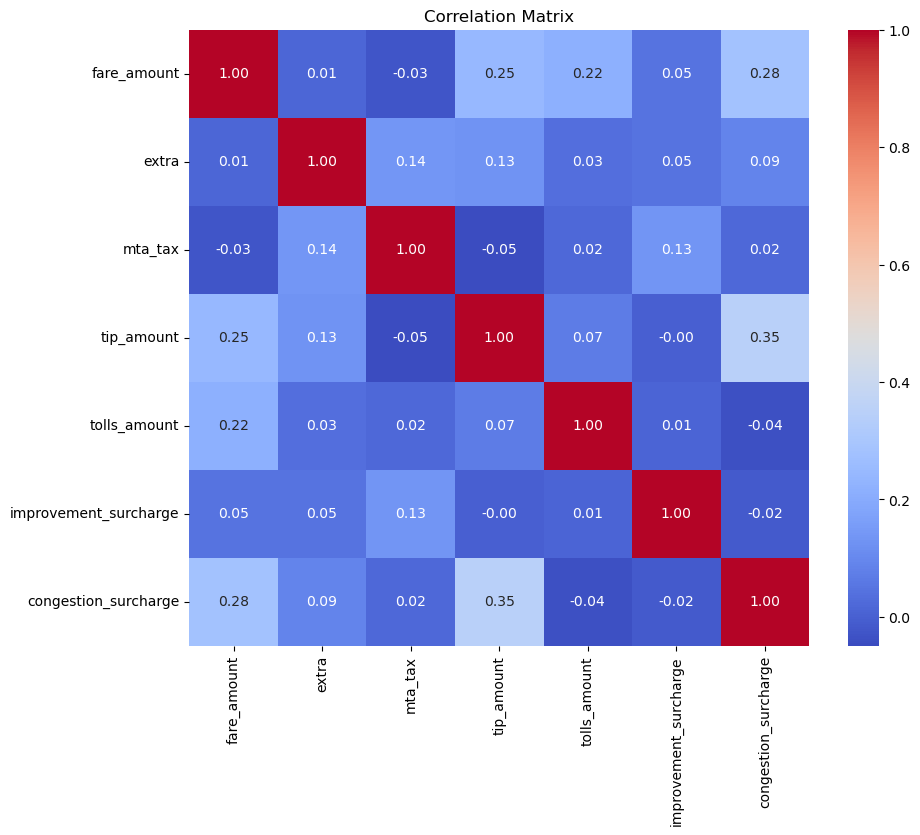

In [398]:
correlation_matrix = df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                          'improvement_surcharge', 'congestion_surcharge']
                        ].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari uji korelasi di atas kita dapat menyimpulkan bahwa 

fare amount tidak dipengaruhi oleh biaya tambahan lainnya seperti extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, dan congestion_surcharge

### Sistem Kendaraan dan Perjalanan

Kita akan menganalisis kolom `VendorID`, `store_and_fwd_flag`, `trip_type`, `RateCodeID`.

Berikut pertanyaan yang dapat mendukung analisis
* Bagaimana pengelompokan transaksi berdasarkan Vendor LPEP?
* Bagaimana pengelompokan transaksi berdasarkan penyimpanan?
* Bagaimana pengelompokan transaksi berdasarkan trip type?
* Bagaimana pengelompokan transaksi berdasarkan RateCodeID?

Pengelompokan Transaksi berdasarkan VendorID

   VendorID  average_total_amount  transaction_count
0         1             21.057173               8860
1         2             21.339998              54445


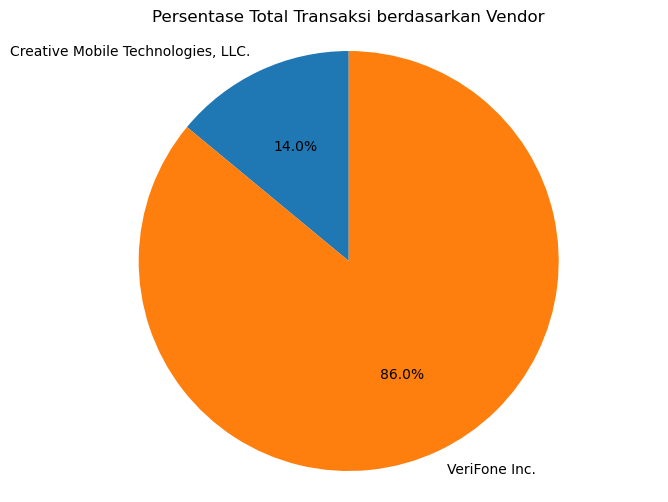

In [399]:

vendor_summary = df.groupby(['VendorID']).agg(
    average_total_amount=('total_amount', 'mean'),
    transaction_count=('total_amount', 'size')
).reset_index()
print(vendor_summary)

vendor_counts = {
    'Creative Mobile Technologies, LLC.': vendor_summary['transaction_count'][0],
    'VeriFone Inc.': vendor_summary['transaction_count'][1],
}

plt.figure(figsize=(8, 6))
plt.pie(vendor_counts.values(), labels=vendor_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Persentase Total Transaksi berdasarkan Vendor')
plt.axis('equal')
plt.show()




Terdapat perbedaan banyaknya transaksi antara 2 vendor.

Vendor Creative Mobile Technologies memiliki sedikit transaksi hanya 14% tapi rata-rata total amount tidak berbeda jauh

Pengelopokan penyimpanan per vendor

In [400]:

vendor_storage_summary = df.groupby(['VendorID', 'store_and_fwd_flag']).agg(
    transaction_count=('total_amount', 'size')
).reset_index()
print(vendor_storage_summary)


   VendorID store_and_fwd_flag  transaction_count
0         1                  N               8577
1         1                  Y                283
2         2                  N              54445
3         2                  Y                  0


Hanya Vendor **Creative Mobile Technologies** yang menyimpan trip record di memori penyimpanan kendaraan

Pengelompokan Trip Type

   trip_type  average_total_amount  transaction_count
0        1.0             21.009486              61946
1        2.0             34.561531               1359


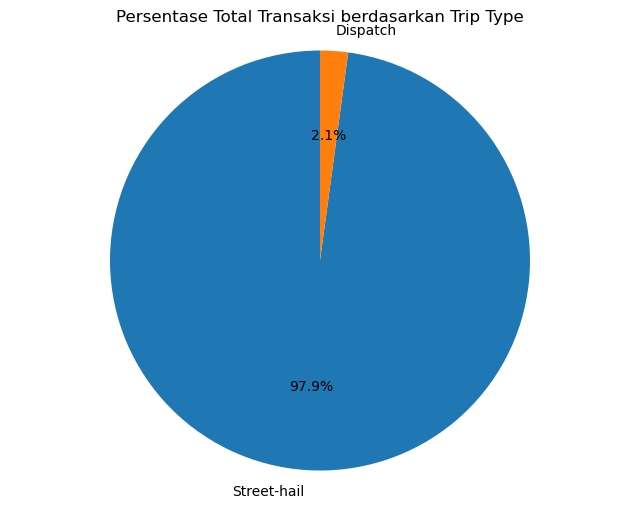

In [401]:
trip_type_summary = df.groupby(['trip_type']).agg(
    average_total_amount=('total_amount', 'mean'),
    transaction_count=('total_amount', 'size')
).reset_index()
print(trip_type_summary)

trip_type_counts = {
    'Street-hail': trip_type_summary['transaction_count'][0],
    'Dispatch': trip_type_summary['transaction_count'][1],
}

plt.figure(figsize=(8, 6))
plt.pie(trip_type_counts.values(), labels=trip_type_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Persentase Total Transaksi berdasarkan Trip Type')
plt.axis('equal')
plt.show()

Dari visualisasi tersebut, terlihat jika pengguna taxi masih memilih perjalanan taxi dengan street-hail atau on the spot

Terlihat pula tipe dispatch atau berdasarkan request memiliki rata-rata yang lebih banyak sehingga bisa disimpulkan bahwa harganya akan lebih mahal

Pengelompokan Rate Code ID

In [402]:
rate_code_summary = df.groupby(['RatecodeID']).agg(
    average_total_amount=('total_amount', 'mean'),
    transaction_count=('total_amount', 'size')
).reset_index()

total_transactions = rate_code_summary['transaction_count'].sum()
rate_code_summary['percentage'] = rate_code_summary['transaction_count'].apply(lambda x: (x / total_transactions) * 100)

print(rate_code_summary)

   RatecodeID  average_total_amount  transaction_count  percentage
0         1.0             20.738041              61577   97.270358
1         2.0             85.014423                156    0.246426
2         3.0             76.973333                 30    0.047390
3         4.0            103.621754                 57    0.090040
4         5.0             33.642088               1485    2.345786


Ratecode terbanyak adalah **Standard Rate** dengan persentasi 97.27%

# Kesimpulan dan Rekomendasi 

## Kesimpulan

1. Transaksi paling banyak terjadi di akhir bulan Januari 
2. Total Transaksi terbanyak 2491 trip sedangkan total amount terbanyak diraih $53,914.59
3. Trip di Weekday lebih banyak dibanding Weekend, namun amount yang dihasilkan hampir sama
4. Penggunaan taxi terbanyak berdasarkan banyaknya penumpang yaitu 1 penumpang
5. Metode pembayaran yang paling sering digunakan adalah credit card
6. Wilayah yang belum tercover pick-up location antara lain 'Queens', 'Manhattan', 'Staten Island', 'Bronx', 'Brooklyn'
7. Wilayah pickup terbanyak di 'Manhattan' dengan zona terbanyak 'East Harlem North' sebanyak 12915 transaksi
8. Tarif tambahan seperti `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `congestion_surcharge` tidak berpengaruh signifikan terhadap tarif dasar (fare_amount)
9. Vendor dengan transaksi terbanyak adalah VeriFone Inc, namum belum memiliki penyimpanan pada memori kendaraan sedangkan Creative Mobile Technologies  sudah memiliki
10. Penggunaan taxi terbanyak dengan metode street-hail
11. Rate code terbanyak adalah Standard-fare

## Rekomendasi
1. Perusahaan dapat memperbanyak armada taxi pada saat musim dingin untuk memenuhi kebutuhan perjalan para penumpang yang meningkat
2. Operasi taxi pada saat Weekend dapat ditambahkan juga
3. Jika ingin menambahkan promo untuk memperbanyak trip dispatch atau penggunaan aplikasi, perusahaan dapat mempertimbangkan kriteria
    * Penumpang 1 orang
    * Pembayaran credit card
4. Perusahaan dapat menambah armada dan operasional di daerah yang belum tercover seperti 'Queens', 'Manhattan', 'Bronx', 'Brooklyn' dan juga daerah dengan transaksi pickup terendah
5. Wilayah 'Staten Island' belum tercover karena perlu menyebrangi laut sehingga bisa menjadi peluang untuk Water Taxi

Dengan mempersempit definisi dari karakteristik tersebut, analisis ini diharapkan dapat membantu perusahaan dalam meningkatkan transaksi, mencari keuntungan dengan lebih efisien, dan ekspansi bisnis